In [ ]:
pip install pygad

### Importación de librerías
* PyGAD se utiliza para la optimización mediante algoritmos genéticos.

In [3]:
import pygad
import numpy
import matplotlib.pyplot as plt

### Variables de entrada y salida
La variable de entrada es una lista de cinco valores y la variable de salida es una lista vacía (que se llenará con los valores de salida obtenidos para cada solución).
También, se define el valor objetivo (setpoint), que es el valor que se quiere aproximar con las soluciones

In [4]:
entrada = [0.5,0.8,0.4,0.1,1]
setpoint = 40
Outs = []

### Función de amplitud
La función evalúa qué tan buena es cada solución. La función toma dos argumentos: la solución (``entrada = [0.5,0.8,0.4,0.1,1]``) y el índice de la solución poblada.

La función calcula la salida de la solución multiplicando la entrada por la solución y sumando los resultados, luego calcula la distancia entre la salida y el setpoint y finalmente retorna el valor de aptitud, que en este caso es la inversa de la distancia calculada

In [5]:
def fitness_func(solution, solution_idx):
    salida = numpy.sum(solution*entrada)
    fitness = 1.0 / (numpy.abs(salida - setpoint) + 0.0001)
    Outs.append(salida)
    plt.plot(Outs)
    return fitness

### Configuración del algoritmo genético por medio de PyGAD
Se especifican los parámetros del algoritmo, como el número de generaciones, el número de soluciones en cada población, el número de genes en cada solución, el número de soluciones padres a utilizar para el cruzamiento, la función de amplitud, el tipo de mutación y la probabilidad de mutación

In [7]:
ga_instance = pygad.GA(num_generations=150,
                        sol_per_pop = 10,
                        num_genes=5,
                        num_parents_mating = 2,
                        fitness_func = fitness_func,
                        mutation_type = "random",
                        mutation_probability = 0.2)

### Ejecución y graficación
Iniciamos la evolución de la población y se grafica la amplitud de la población a lo largo de las generaciones

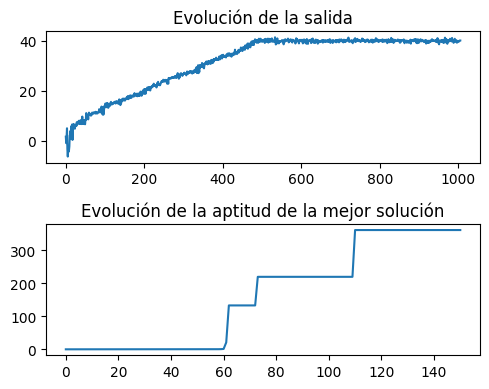

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4))
axs[0].plot(Outs)
axs[0].set_title('Evolución de la salida')
axs[1].plot(ga_instance.best_solutions_fitness)
axs[1].set_title('Evolución de la aptitud de la mejor solución')
plt.tight_layout()
plt.show()